In [48]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


# Load Data into pandas
df:pd.DataFrame = pd.read_csv('UsArrests.csv')
df['City'] = df['City'].astype('string')
# Rename the 'City' column to 'State'
df.rename(columns={'City': 'State'},inplace=True)
# Drop any rows with missing data
df = df.dropna()
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [49]:
# Drop the non-numeric columns and convert remaining columns to floats
df = df.drop('State', axis=1)
df = df.apply(pd.to_numeric)
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


AttributeError: 'bool' object has no attribute 'all'

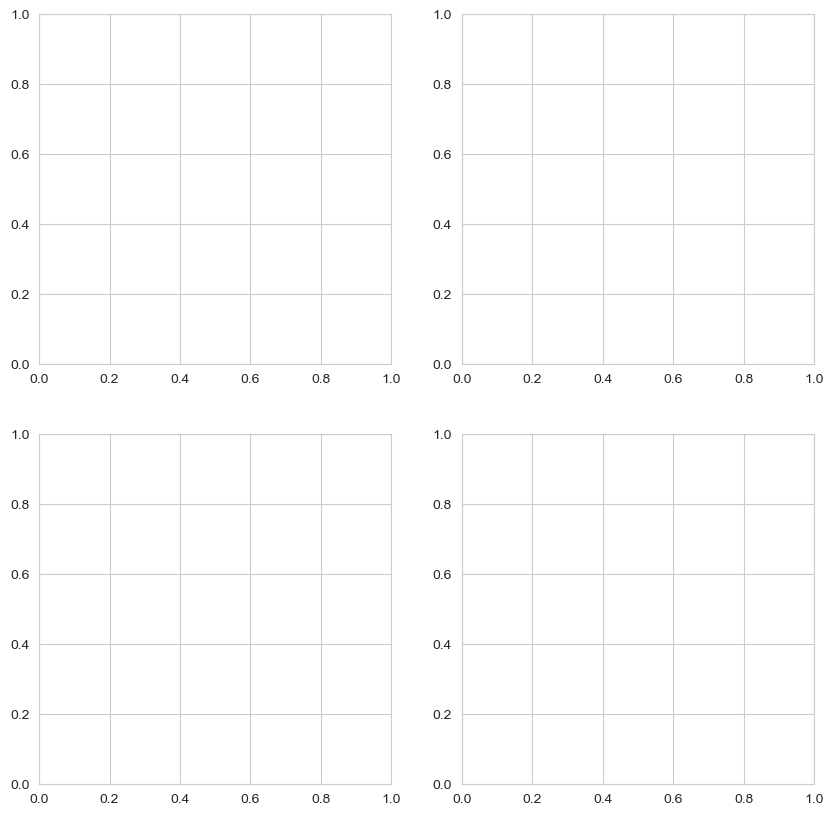

In [50]:
# Convert the DataFrame to a PyTorch tensor
data = torch.tensor(df.values, dtype=torch.float)

